In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite").connect()

In [5]:
# reflect an existing database into a new model
#declare table structures as base, then use to reflect - then load them into base
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement 
station = Base.classes.station 

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

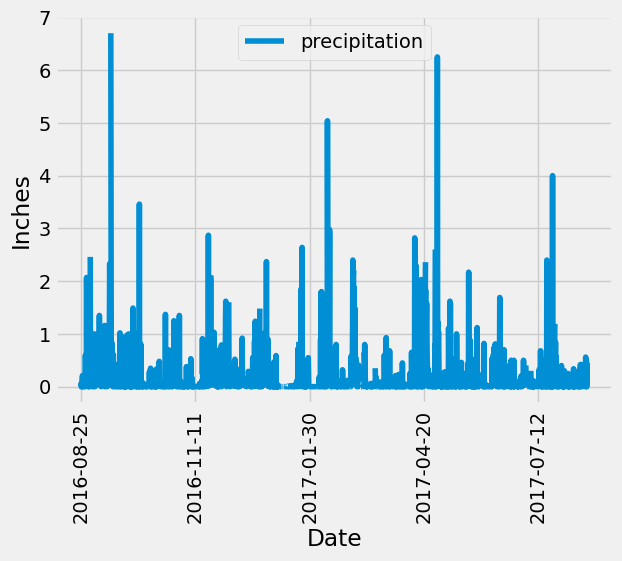

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearb4 = dt.date(2017, 8, 24) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date > yearb4).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data, columns=["date", "precipitation"])

# Sort the dataframe by date
prcp_sorted = prcp_df.sort_values(by=["date"])

# Use Pandas Plotting with Matplotlib to plot the data
prcp_sorted.plot(x= "date", y= "precipitation")
prcp_sorted.set_index('date', inplace=True)
plt.xticks(rotation='vertical')
plt.xlabel("Date") 
plt.ylabel("Inches")
plt.show()

# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset


In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [15]:
# Close Session
session.close()